In [17]:
import yfinance as yf

# 獲取台積電財務數據
tsmc = yf.Ticker("2330.TW")

# 獲取季度財報
quarterly_financials = tsmc.quarterly_financials
print("\n台積電季度財報:")
print(quarterly_financials)

# 獲取每季營收
quarterly_revenue = quarterly_financials.loc["Total Revenue"]
print("\n台積電季度營收:")
print(quarterly_revenue)


台積電季度財報:
                                                        2024-12-31  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                        0.165618   
Normalized EBITDA                                   596091000000.0   
Total Unusual Items                                            NaN   
Total Unusual Items Excluding Goodwill                         NaN   
Net Income From Continuing Operation Net Minori...  374680000000.0   
Reconciled Depreciation                             170378000000.0   
Reconciled Cost Of Revenue                          356082000000.0   
EBITDA                                              596091000000.0   
EBIT                                                425713000000.0   
Net Interest Income                                  21750000000.0   
Interest Expense                                               NaN   
Interest Income                                                NaN   
Normalized

In [18]:
import yfinance as yf
import pandas as pd

def get_stock_financials(stock_id):
    """使用 yfinance 獲取股票基本財務數據"""
    # 添加 .TW 後綴
    if not stock_id.endswith('.TW') and not stock_id.endswith('.TWO'):
        if len(stock_id) == 4:  # 上櫃股票
            ticker = f"{stock_id}.TWO"
        else:  # 上市股票
            ticker = f"{stock_id}.TW"
    else:
        ticker = stock_id
    
    try:
        stock = yf.Ticker(ticker)
        
        # 獲取基本信息
        info = stock.info
        print(f"已獲取 {stock_id} 基本資料")
        
        # 獲取財務報表
        financial_data = {}
        financial_data['損益表(季)'] = stock.quarterly_income_stmt
        financial_data['資產負債表(季)'] = stock.quarterly_balance_sheet
        financial_data['現金流量表(季)'] = stock.quarterly_cashflow
        
        # 獲取EPS歷史數據
        financial_data['EPS預測'] = stock.earnings
        
        return {
            'info': info,
            'financials': financial_data
        }
    except Exception as e:
        print(f"獲取 {ticker} 財務數據時發生錯誤: {e}")
        return None

# 使用範例
tsmc_financials = get_stock_financials('2330')

# 顯示基本資訊
if tsmc_financials:
    info = tsmc_financials['info']
    print("\n基本資訊:")
    print(f"公司名稱: {info.get('longName', 'N/A')}")
    print(f"產業: {info.get('industry', 'N/A')}")
    print(f"市值: {info.get('marketCap', 'N/A'):,} TWD")
    print(f"本益比: {info.get('trailingPE', 'N/A')}")
    print(f"股息率: {info.get('dividendYield', 'N/A')}")
    
    # 顯示最近一季的收入
    income_stmt = tsmc_financials['financials']['損益表(季)']
    if not income_stmt.empty:
        print("\n最近一季財務數據:")
        print(f"營收: {income_stmt.loc['Total Revenue'].iloc[0]:,.0f}")
        print(f"淨利: {income_stmt.loc['Net Income'].iloc[0]:,.0f}")

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/2330.TWO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=2330.TWO&crumb=xE1IBRsHA.1


獲取 2330.TWO 財務數據時發生錯誤: 'NoneType' object has no attribute 'update'


In [19]:
import yfinance as yf

# 創建 Ticker 物件
tsmc = yf.Ticker("2330.TW")

In [20]:
# 獲取基本信息
info = tsmc.info

# 顯示關鍵資訊
print(f"公司名稱: {info.get('longName')}")
print(f"產業: {info.get('industry')}")
print(f"市值: {info.get('marketCap'):,}")
print(f"本益比: {info.get('trailingPE')}")
print(f"股息率: {info.get('dividendYield')}")
print(f"52週最高: {info.get('fiftyTwoWeekHigh')}")
print(f"52週最低: {info.get('fiftyTwoWeekLow')}")

公司名稱: Taiwan Semiconductor Manufacturing Company Limited
產業: Semiconductors
市值: 26,970,008,059,904
本益比: 22.988504
股息率: 1.73
52週最高: 1160.0
52週最低: 711.0


In [21]:
# 資產負債表
balance_sheet = tsmc.balance_sheet
print("資產負債表:\n", balance_sheet.head())

# 損益表
income_stmt = tsmc.income_stmt
print("損益表:\n", income_stmt.head())

# 現金流量表
cashflow = tsmc.cashflow
print("現金流量表:\n", cashflow.head())

# 季度報表
quarterly_income = tsmc.quarterly_income_stmt
print("季度損益表:\n", quarterly_income.head())

資產負債表:
                              2024-12-31       2023-12-31       2022-12-31  \
Treasury Shares Number              NaN              0.0              NaN   
Ordinary Shares Number    25932733000.0    25932070992.0    25930380458.0   
Share Issued              25932733000.0    25932070992.0    25930380458.0   
Total Debt               986462000000.0   956257900000.0   888174400000.0   
Tangible Book Value     4288545000000.0  3406755700000.0  2877020500000.0   

                             2021-12-31 2020-12-31  
Treasury Shares Number              NaN        NaN  
Ordinary Shares Number    25930380458.0        NaN  
Share Issued              25930380458.0        NaN  
Total Debt               753631900000.0        NaN  
Tangible Book Value     2122438100000.0        NaN  
損益表:
                                              2024-12-31       2023-12-31  \
Tax Effect Of Unusual Items                         0.0              0.0   
Tax Rate For Calcs                             0.1660

In [22]:
# 分析師評級
recommendations = tsmc.recommendations
print("分析師評級:\n", recommendations.tail())

# 獲取盈利預測
earnings = tsmc.earnings
print("盈利歷史和預測:\n", earnings)

分析師評級:
   period  strongBuy  buy  hold  sell  strongSell
0     0m          8   23     1     0           0
1    -1m          8   23     1     0           0
2    -2m          9   22     1     0           0
盈利歷史和預測:
 None


/Users/angelo/Desktop/stack_predict/.venv/lib/python3.11/site-packages/yfinance/scrapers/fundamentals.py:33: DeprecationWarning: 'Ticker.earnings' is deprecated as not available via API. Look for "Net Income" in Ticker.income_stmt.
  warnings.warn("'Ticker.earnings' is deprecated as not available via API. Look for \"Net Income\" in Ticker.income_stmt.", DeprecationWarning)


In [23]:
# 主要股東
major_holders = tsmc.major_holders
print("主要股東:\n", major_holders)

# 機構持股
institutional_holders = tsmc.institutional_holders
print("機構持股:\n", institutional_holders)

主要股東:
 Breakdown                         Value
insidersPercentHeld             0.00000
institutionsPercentHeld         0.43335
institutionsFloatPercentHeld    0.43335
institutionsCount             696.00000
機構持股:
   Date Reported                Holder  pctHeld  Shares    Value  pctChange
0    2024-12-31  Pacer Advisors, Inc.      0.0    2551  2653040    -0.1927


In [24]:
# 獲取歷史數據，包括股息調整
history = tsmc.history(period="5y", auto_adjust=True)
print("歷史數據:\n", history.head())

# 獲取股息歷史
dividends = tsmc.dividends
print("股息歷史:\n", dividends)

# 股票分割歷史
splits = tsmc.splits
print("股票分割:\n", splits)

歷史數據:
                                  Open        High         Low       Close  \
Date                                                                        
2020-02-27 00:00:00+08:00  287.247961  288.148425  283.646106  284.546570   
2020-03-02 00:00:00+08:00  277.342829  285.447002  277.342829  280.044220   
2020-03-03 00:00:00+08:00  286.797711  288.148407  284.546552  285.897247   
2020-03-04 00:00:00+08:00  289.949298  289.949298  285.446979  288.598602   
2020-03-05 00:00:00+08:00  292.650843  293.551307  290.849915  290.849915   

                             Volume  Dividends  Stock Splits  
Date                                                          
2020-02-27 00:00:00+08:00  61250927        0.0           0.0  
2020-03-02 00:00:00+08:00  79912942        0.0           0.0  
2020-03-03 00:00:00+08:00  49679411        0.0           0.0  
2020-03-04 00:00:00+08:00  42941146        0.0           0.0  
2020-03-05 00:00:00+08:00  37861525        0.0           0.0  
股息歷史:
 Date


In [25]:
# 獲取歷史數據，包括股息調整
history = tsmc.history(period="5y", auto_adjust=True)
print("歷史數據:\n", history.head())

# 獲取股息歷史
dividends = tsmc.dividends
print("股息歷史:\n", dividends)

# 股票分割歷史
splits = tsmc.splits
print("股票分割:\n", splits)

歷史數據:
                                  Open        High         Low       Close  \
Date                                                                        
2020-02-27 00:00:00+08:00  287.247931  288.148394  283.646076  284.546539   
2020-03-02 00:00:00+08:00  277.342859  285.447033  277.342859  280.044250   
2020-03-03 00:00:00+08:00  286.797711  288.148407  284.546552  285.897247   
2020-03-04 00:00:00+08:00  289.949328  289.949328  285.447010  288.598633   
2020-03-05 00:00:00+08:00  292.650781  293.551245  290.849854  290.849854   

                             Volume  Dividends  Stock Splits  
Date                                                          
2020-02-27 00:00:00+08:00  61250927        0.0           0.0  
2020-03-02 00:00:00+08:00  79912942        0.0           0.0  
2020-03-03 00:00:00+08:00  49679411        0.0           0.0  
2020-03-04 00:00:00+08:00  42941146        0.0           0.0  
2020-03-05 00:00:00+08:00  37861525        0.0           0.0  
股息歷史:
 Date


/Users/angelo/Desktop/stack_predict/.venv/lib/python3.11/site-packages/yfinance/scrapers/fundamentals.py:33: DeprecationWarning: 'Ticker.earnings' is deprecated as not available via API. Look for "Net Income" in Ticker.income_stmt.
  warnings.warn("'Ticker.earnings' is deprecated as not available via API. Look for \"Net Income\" in Ticker.income_stmt.", DeprecationWarning)



====== 5439.TWO 波段操作分析 ======

基本信息:
公司: First Hi-tec Enterprise Co., Ltd.
行業: Electronic Components
現價: 138.5
52週區間: 68.6 - 145.0
波動率(Beta): 0.921

基本面評估:
本益比: 43.146416
本益成長比: 0
股息率: 296.0

技術面評估:
當前趨勢: 強勢上升
相對20日均線: 12.10%
近20交易日表現: 28.24%
14日RSI: 74.42
年化波動率: 47.14%

波段操作適宜性:
⚠️ 波動性過高，風險較大
✅ 交易量充足，流動性佳
✅ 處於上升趨勢，順勢操作有利
⚠️ RSI處於超買區域，上漲空間有限

波段操作綜合評分: 2/5
⭐ 可考慮波段操作，但需謹慎


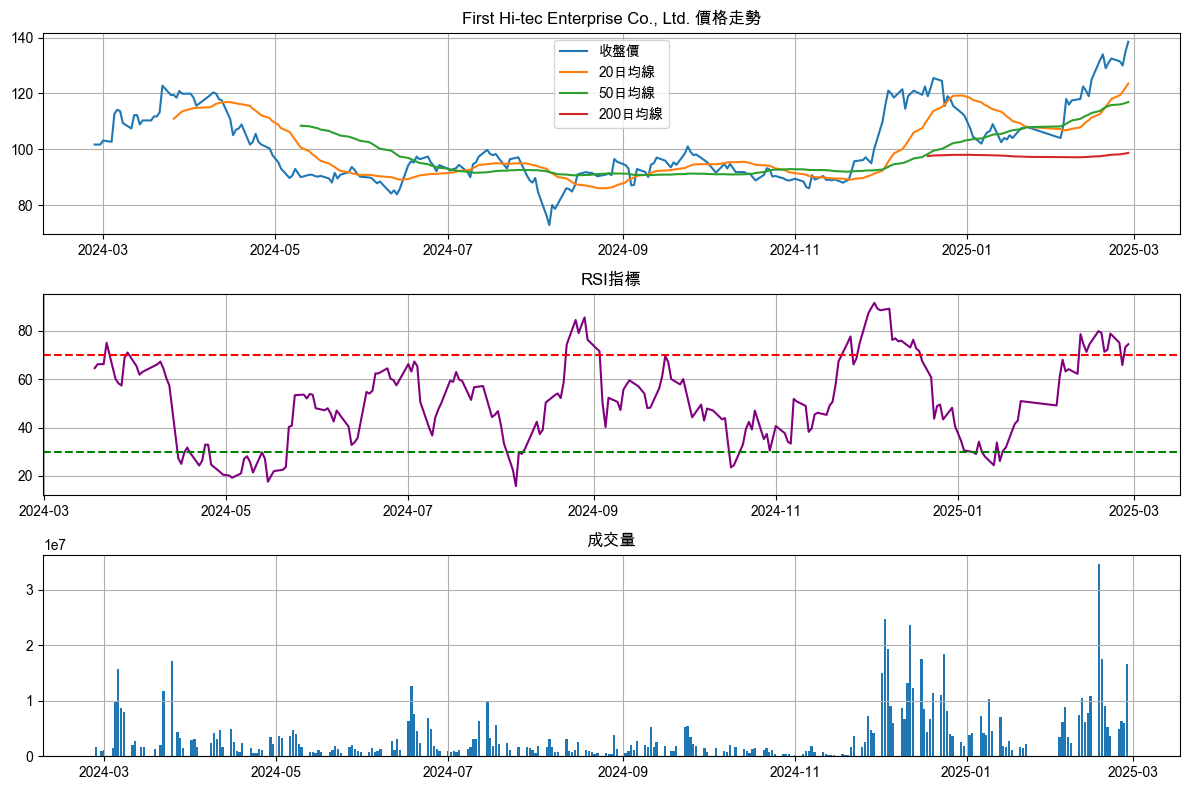

In [31]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import platform
# 設定中文字體支援
if platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang HK', 'Heiti TC']
    plt.rcParams['axes.unicode_minus'] = False
elif platform.system() == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei']
    plt.rcParams['axes.unicode_minus'] = False
else:  # Linux
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei', 'Droid Sans Fallback']



def analyze_stock_for_swing_trading(ticker, period="1y"):
    """綜合分析一支股票的波段操作價值"""
    stock = yf.Ticker(ticker)
    
    # 1. 獲取股價數據和技術指標
    data = stock.history(period=period)
    
    # 2. 獲取基本面數據
    info = stock.info
    
    try:
        quarterly_earnings = stock.quarterly_earnings
    except:
        quarterly_earnings = None
    
    # 3. 取得分析師評級
    try:
        recommendations = stock.recommendations
    except:
        recommendations = pd.DataFrame()
    
    # 4. 建立綜合分析報告
    print(f"\n====== {ticker} 波段操作分析 ======")
    
    # 基本信息
    print("\n基本信息:")
    print(f"公司: {info.get('longName', '未知')}")
    print(f"行業: {info.get('industry', '未知')}")
    print(f"現價: {info.get('currentPrice', data['Close'].iloc[-1] if not data.empty else '未知')}")
    print(f"52週區間: {info.get('fiftyTwoWeekLow', '未知')} - {info.get('fiftyTwoWeekHigh', '未知')}")
    print(f"波動率(Beta): {info.get('beta', '未知')}")
    
    # 基本面強弱
    print("\n基本面評估:")
    pe = info.get('trailingPE', 0)
    peg = info.get('pegRatio', 0)
    print(f"本益比: {pe}")
    print(f"本益成長比: {peg}")
    print(f"股息率: {info.get('dividendYield', 0) * 100 if info.get('dividendYield') else '無股息'}")
    
    if pe and peg:
        if pe < 15 and peg < 1:
            print("✅ 估值低於市場平均，潛在價值投資機會")
        elif pe > 30 or peg > 2:
            print("⚠️ 估值偏高，需謹慎操作")
    
    # 分析師評級 (修正這部分)
    if not recommendations.empty:
        try:
            recent_rec = recommendations.iloc[-1]
            print("\n最新分析師評級:")
            
            # 檢查列名並顯示評級
            to_grade_col = [col for col in recommendations.columns if 'grade' in col.lower() or 'rating' in col.lower()]
            price_target_col = [col for col in recommendations.columns if 'target' in col.lower() or 'price' in col.lower()]
            
            if to_grade_col:
                print(f"評級: {recent_rec[to_grade_col[0]]}")
            else:
                print("評級: 無法獲取")
                
            if price_target_col:
                print(f"目標價: {recent_rec[price_target_col[0]]}")
            else:
                print("目標價: 無法獲取")
        except Exception as e:
            print(f"無法獲取分析師評級: {e}")
    
    # 技術面評估
    print("\n技術面評估:")
    
    # 計算均線
    data['SMA20'] = data['Close'].rolling(window=20).mean()
    data['SMA50'] = data['Close'].rolling(window=50).mean()
    data['SMA200'] = data['Close'].rolling(window=200).mean()
    
    # 最新價格相對於均線的位置
    last_close = data['Close'].iloc[-1]
    last_sma20 = data['SMA20'].iloc[-1]
    last_sma50 = data['SMA50'].iloc[-1]
    last_sma200 = data['SMA200'].iloc[-1]
    
    # 判斷趨勢
    trend = "中性"
    if last_close > last_sma20 > last_sma50 > last_sma200:
        trend = "強勢上升"
    elif last_close < last_sma20 < last_sma50 < last_sma200:
        trend = "強勢下降"
    elif last_close > last_sma50 and last_sma20 > last_sma50:
        trend = "中期上升"
    elif last_close < last_sma50 and last_sma20 < last_sma50:
        trend = "中期下降"
    
    # 相對強弱
    recent_perf = (last_close / data['Close'].iloc[-20] - 1) * 100
    print(f"當前趨勢: {trend}")
    print(f"相對20日均線: {(last_close / last_sma20 - 1) * 100:.2f}%")
    print(f"近20交易日表現: {recent_perf:.2f}%")
    
    # 計算RSI
    delta = data['Close'].diff()
    gain = delta.clip(lower=0).fillna(0)
    loss = -delta.clip(upper=0).fillna(0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss.replace(0, np.finfo(float).eps)  # 避免除以零
    rsi = 100 - (100 / (1 + rs))
    data['RSI14'] = rsi
    last_rsi = data['RSI14'].iloc[-1]
    
    print(f"14日RSI: {last_rsi:.2f}")
    
    # 波動性評估
    volatility = data['Close'].pct_change().std() * (252 ** 0.5) * 100
    print(f"年化波動率: {volatility:.2f}%")
    
    # 波段操作適宜性評估
    print("\n波段操作適宜性:")
    swing_score = 0
    
    # 評分因素
    if 15 < volatility < 40:
        print("✅ 適中的波動性，有足夠的價格變化空間")
        swing_score += 2
    elif volatility > 40:
        print("⚠️ 波動性過高，風險較大")
    else:
        print("⚠️ 波動性較低，收益空間有限")
    
    # 流動性評估
    avg_volume = data['Volume'].mean()
    if avg_volume > 1000000:
        print("✅ 交易量充足，流動性佳")
        swing_score += 1
    
    # 趨勢評估
    if trend in ["中期上升", "強勢上升"]:
        print("✅ 處於上升趨勢，順勢操作有利")
        swing_score += 1
    
    # RSI評估
    if 40 <= last_rsi <= 60:
        print("✅ RSI處於中性區域，波段操作空間大")
        swing_score += 1
    elif last_rsi < 30:
        print("⚠️ RSI處於超賣區域，可能有反彈機會")
    elif last_rsi > 70:
        print("⚠️ RSI處於超買區域，上漲空間有限")
    
    # 綜合評分
    print(f"\n波段操作綜合評分: {swing_score}/5")
    if swing_score >= 4:
        print("🌟🌟 極佳的波段操作標的")
    elif swing_score == 3:
        print("🌟 良好的波段操作標的")
    elif swing_score == 2:
        print("⭐ 可考慮波段操作，但需謹慎")
    else:
        print("❌ 不推薦波段操作，風險較高")
    
    # 繪製圖表
    try:
        plt.figure(figsize=(12, 8))
        plt.subplot(3, 1, 1)
        plt.title(f"{info.get('longName', ticker)} 價格走勢")
        plt.plot(data.index, data['Close'], label='收盤價')
        plt.plot(data.index, data['SMA20'], label='20日均線')
        plt.plot(data.index, data['SMA50'], label='50日均線')
        plt.plot(data.index, data['SMA200'], label='200日均線')
        plt.legend()
        plt.grid(True)
        
        plt.subplot(3, 1, 2)
        plt.title('RSI指標')
        plt.plot(data.index, data['RSI14'], color='purple')
        plt.axhline(y=70, color='r', linestyle='--')
        plt.axhline(y=30, color='g', linestyle='--')
        plt.grid(True)
        
        plt.subplot(3, 1, 3)
        plt.title('成交量')
        plt.bar(data.index, data['Volume'])
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"繪製圖表時出錯: {e}")
    
    return data

# 分析台積電
tsmc_data = analyze_stock_for_swing_trading('5439.TWO')

In [35]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

def format_taiwan_stock_code(stock_code):
    """
    智能格式化台灣股票代碼
    
    處理規則:
    1. 如果已包含.TW或.TWO，直接返回
    2. 上市股票通常是4位數字代碼，上櫃股票通常是4位數字
    3. 嘗試兩種格式，選擇有效的那個
    """
    # 已經包含後綴，直接返回
    if '.TW' in stock_code or '.TWO' in stock_code:
        return stock_code
    
    # 移除任何非數字字符
    clean_code = ''.join(filter(str.isdigit, stock_code))
    
    # 構建可能的代碼格式
    tw_code = f"{clean_code}.TW"
    two_code = f"{clean_code}.TWO"
    
    # 嘗試找出哪個是有效的
    try:
        # 先嘗試.TW (大多數股票是上市的)
        ticker = yf.Ticker(tw_code)
        info = ticker.info
        if 'regularMarketPrice' in info and info['regularMarketPrice'] is not None:
            print(f"檢測到上市股票: {tw_code}")
            return tw_code
    except:
        pass
    
    try:
        # 再嘗試.TWO
        ticker = yf.Ticker(two_code)
        info = ticker.info
        if 'regularMarketPrice' in info and info['regularMarketPrice'] is not None:
            print(f"檢測到上櫃股票: {two_code}")
            return two_code
    except:
        pass
    
    # 根據經驗判斷 (台灣常見規則)
    if len(clean_code) == 4:
        # 特定範圍的代碼通常是上櫃
        if clean_code.startswith('5') or clean_code.startswith('6') or clean_code.startswith('8'):
            print(f"根據代碼規則推測為上櫃股票: {two_code}")
            return two_code
        else:
            print(f"根據代碼規則推測為上市股票: {tw_code}")
            return tw_code
            
    # 默認返回.TW格式 (可能會失敗，但提供了一個默認值)
    print(f"無法確定股票類型，默認使用上市格式: {tw_code}")
    return tw_code

def analyze_stock_for_swing_trading(ticker, period="1y"):
    """綜合分析一支股票的波段操作價值"""
    # 格式化股票代碼
    formatted_ticker = format_taiwan_stock_code(ticker)
    
    print(f"開始分析股票: {formatted_ticker}")
    
    try:
        # 創建Ticker物件
        stock = yf.Ticker(formatted_ticker)
        
        # 1. 獲取股價數據
        data = stock.history(period=period)
        if data.empty:
            print(f"無法獲取 {formatted_ticker} 的股價數據")
            return None
            
        # 2. 獲取基本面數據 - 添加錯誤處理
        try:
            info = stock.info
        except Exception as e:
            print(f"獲取基本信息失敗: {e}")
            info = {}
        
        # 以下代碼與之前的相同，只是添加更多錯誤處理...
        
        # [此處省略之前的代碼，與您之前的保持一致]
        
        return data
        
    except Exception as e:
        print(f"分析股票 {formatted_ticker} 時出錯: {e}")
        return None

# 台股批量分析功能
def analyze_multiple_stocks(stock_list):
    """分析多支台股，找出適合波段操作的標的"""
    results = []
    
    for stock_code in stock_list:
        print(f"\n正在分析 {stock_code}...")
        try:
            data = analyze_stock_for_swing_trading(stock_code)
            # 避免API請求過於頻繁
            time.sleep(1)
            if data is not None:
                results.append(stock_code)
        except Exception as e:
            print(f"分析 {stock_code} 時出錯: {e}")
    
    return results

# 示例用法
# 混合上市和上櫃股票代碼測試
stocks = ["2330", "2317", "5439", "2454", "6104"]
analyze_multiple_stocks(stocks)

# 或分析單一股票
# analyze_stock_for_swing_trading("2330")  # 上市股票
# analyze_stock_for_swing_trading("5439")  # 上櫃股票


正在分析 2330...
檢測到上市股票: 2330.TW
開始分析股票: 2330.TW

正在分析 2317...
檢測到上市股票: 2317.TW
開始分析股票: 2317.TW

正在分析 5439...


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/5439.TW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=5439.TW&crumb=xE1IBRsHA.1


檢測到上櫃股票: 5439.TWO
開始分析股票: 5439.TWO

正在分析 2454...
檢測到上市股票: 2454.TW
開始分析股票: 2454.TW

正在分析 6104...


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/6104.TW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=6104.TW&crumb=xE1IBRsHA.1


檢測到上櫃股票: 6104.TWO
開始分析股票: 6104.TWO


['2330', '2317', '5439', '2454', '6104']

In [32]:
#單一股票分析：
analyze_stock_for_swing_trading("6168")

$6168: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/6168?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=6168&crumb=xE1IBRsHA.1


AttributeError: 'NoneType' object has no attribute 'update'

In [ ]:
#多股票批量篩選：
# 可以混合各種格式
stocks_to_analyze = ["2330", "2317.TW", "5439", "6104.TWO"]
good_targets = analyze_multiple_stocks(stocks_to_analyze)

/Users/angelo/Desktop/stack_predict/.venv/lib/python3.11/site-packages/yfinance/scrapers/fundamentals.py:33: DeprecationWarning: 'Ticker.earnings' is deprecated as not available via API. Look for "Net Income" in Ticker.income_stmt.
  warnings.warn("'Ticker.earnings' is deprecated as not available via API. Look for \"Net Income\" in Ticker.income_stmt.", DeprecationWarning)



====== 6168.TW 波段操作分析 ======

基本信息:
公司: Harvatek Corporation
行業: Semiconductors
現價: 22.25
52週區間: 18.15 - 26.75
波動率(Beta): 0.747

基本面評估:
本益比: 247.22221
本益成長比: 0
股息率: 225.0

最新分析師評級:
評級: 無法獲取
目標價: 無法獲取

技術面評估:
當前趨勢: 中期上升
相對20日均線: 0.02%
近20交易日表現: 4.71%
14日RSI: 53.13
年化波動率: 35.23%

波段操作適宜性:
✅ 適中的波動性，有足夠的價格變化空間
✅ 交易量充足，流動性佳
✅ 處於上升趨勢，順勢操作有利
✅ RSI處於中性區域，波段操作空間大

波段操作綜合評分: 5/5
🌟🌟 極佳的波段操作標的


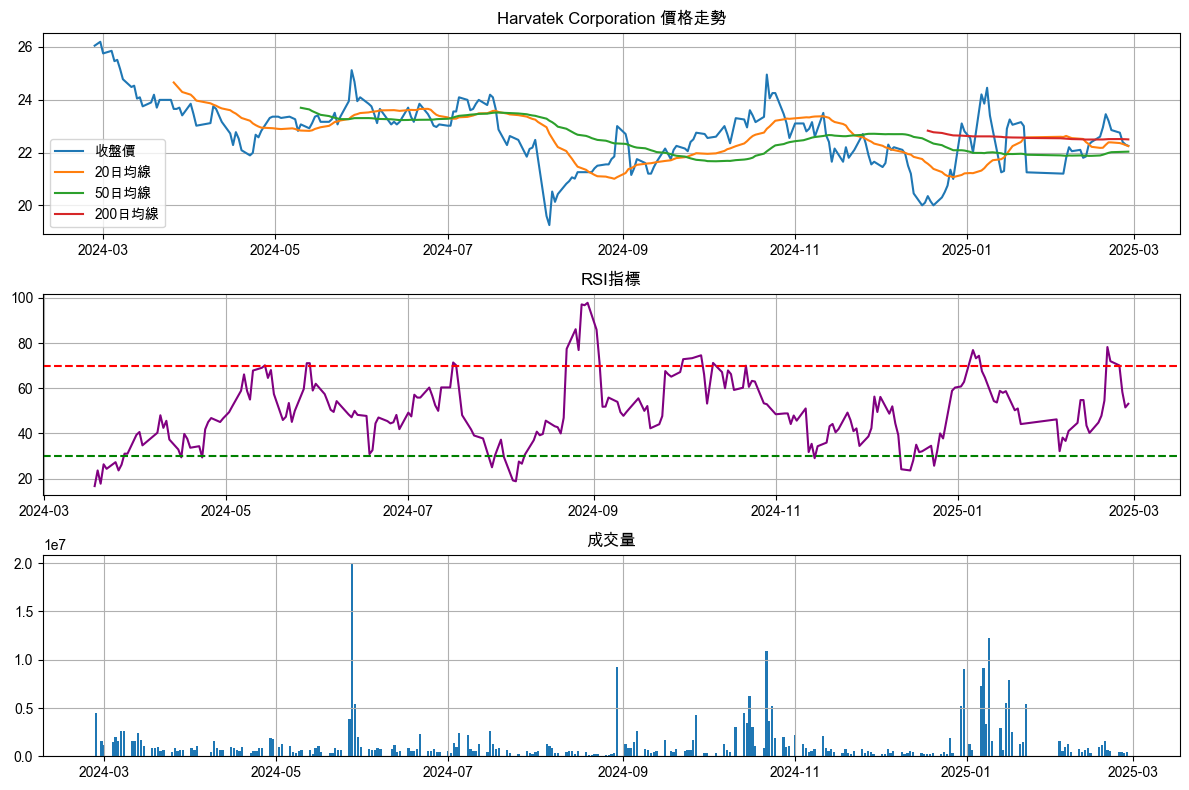

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA20,SMA50,SMA200,RSI14
Date,,,,,,,,,,,
2024-02-27 00:00:00+08:00,26.044319,26.386365,25.604548,26.044319,4529898,0.0,0.0,NaN,NaN,NaN,NaN
2024-02-29 00:00:00+08:00,26.044318,26.288636,25.848864,26.190908,1618786,0.0,0.0,NaN,NaN,NaN,NaN
2024-03-01 00:00:00+08:00,26.190908,26.190908,25.653409,25.751137,1190171,0.0,0.0,NaN,NaN,NaN,NaN
2024-03-04 00:00:00+08:00,25.897728,26.044319,25.604547,25.848866,1445029,0.0,0.0,NaN,NaN,NaN,NaN
2024-03-05 00:00:00+08:00,25.848865,26.142046,25.360229,25.457954,1959782,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-21 00:00:00+08:00,23.299999,23.299999,22.799999,22.850000,567005,0.0,0.0,22.3825,22.012,22.508227,71.999961
2025-02-24 00:00:00+08:00,22.799999,23.000000,22.600000,22.750000,423532,0.0,0.0,22.3575,22.021,22.509102,70.129828
2025-02-25 00:00:00+08:00,22.600000,22.600000,22.250000,22.400000,416006,0.0,0.0,22.3250,22.027,22.507006,58.333320


In [34]:
#特殊情況：如果自動判斷失敗，可以直接提供完整代碼：
analyze_stock_for_swing_trading("6168.TW")